# Perceptron

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('Iris Dataset - iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.shape

(150, 6)

In [22]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Split the x and y

In [23]:
df_sample = df[df['Species'] != 'Iris-virginica']

x = df_sample.iloc[:, 1:5].values
y = df_sample['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1}).values

In [24]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [25]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Train test split

In [26]:

np.random.seed(42)

# Get the number of samples
num_samples = len(x)

# Shuffle indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Calculate the index to split the data into training and testing sets
split_index = int(0.8 * num_samples)

# Split the data
x_train, x_test = x[indices[:split_index]], x[indices[split_index:]]
y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]


# Checking the shapes of the training and testing sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (80, 4)
y_train shape: (80,)
x_test shape: (20, 4)
y_test shape: (20,)


In [27]:
mean_train = np.mean(x_train, axis=0)
std_train = np.std(x_train, axis=0)
x_train = (x_train - mean_train) / std_train
x_test = (x_test - mean_train) / std_train

# Checking the shapes of the scaled training and testing sets
print("x_train_scaled shape:", x_train.shape)
print("x_test_scaled shape:", x_test.shape)

x_train_scaled shape: (80, 4)
x_test_scaled shape: (20, 4)


In [28]:
x_train

array([[ 0.93795953, -0.85198001,  1.62106391,  1.50324701],
       [ 0.13111262, -1.68065358,  0.85286992,  0.96954984],
       [ 0.77659015,  0.18386195,  1.41155646,  1.85904511],
       [-0.99847305, -0.23047484, -0.96286133, -0.8094407 ],
       [-0.5143649 ,  1.4268723 , -0.61368225, -0.63154164],
       [-0.5143649 ,  0.59819873, -0.89302552, -0.98733975],
       [-1.32121181,  1.01253552, -1.2422046 , -0.98733975],
       [ 0.13111262, -1.47348519,  0.71319829,  0.61375174],
       [-0.03025676,  1.21970391, -0.89302552, -0.98733975],
       [-0.5143649 ,  0.80536712, -0.96286133, -0.98733975],
       [ 0.45385139,  1.4268723 , -0.75335388, -0.8094407 ],
       [-0.99847305, -0.02330644, -0.8231897 , -0.98733975],
       [ 1.09932891, -0.64481162,  1.34172064,  0.79165079],
       [ 0.13111262,  2.25554587, -0.96286133, -0.98733975],
       [ 0.13111262, -1.05914841,  1.13221319,  0.79165079],
       [-0.67573429,  1.01253552, -0.96286133, -0.98733975],
       [ 2.22891458, -0.

## Perceptron class

In [32]:
class Perceptron:
    
    def __init__(self, learning_rate=0.0001, epochs=100):
        self.w = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def output_layer(self, x):
        return np.dot(x, self.w)
    
    def step(self, x):
        return np.where(x >= 0, 1, 0)
        
    def mse(self, y_true, y_pred):
        return ((y_pred - y_true) ** 2).mean()    
        
    def fit(self, x_train, y_train):
        x_train = np.c_[np.ones(x_train.shape[0]), x_train]
        self.w = np.zeros(x_train.shape[1])  # Reshape not needed
        
        for epoch in range(self.epochs):
            preds = self.output_layer(x_train)
            y_pred = np.vectorize(self.step)(preds)
            
            error = self.mse(y_train, y_pred)
            dE_dW = -2 * np.dot((y_train - y_pred), x_train) / len(y_train)
            
            self.w -= self.learning_rate * dE_dW
            
            print(f'Iteration: {epoch}, Error: {error}')
    
    def predict(self, x_test):
        x_test = np.c_[np.ones(x_test.shape[0]), x_test]
        predictions = self.output_layer(x_test)
        y_test = np.vectorize(self.step)(predictions)
        return y_test


In [33]:
perceptron = Perceptron(learning_rate=0.0001, epochs=100)
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_test)

Iteration: 0, Error: 0.525
Iteration: 1, Error: 0.0
Iteration: 2, Error: 0.0
Iteration: 3, Error: 0.0
Iteration: 4, Error: 0.0
Iteration: 5, Error: 0.0
Iteration: 6, Error: 0.0
Iteration: 7, Error: 0.0
Iteration: 8, Error: 0.0
Iteration: 9, Error: 0.0
Iteration: 10, Error: 0.0
Iteration: 11, Error: 0.0
Iteration: 12, Error: 0.0
Iteration: 13, Error: 0.0
Iteration: 14, Error: 0.0
Iteration: 15, Error: 0.0
Iteration: 16, Error: 0.0
Iteration: 17, Error: 0.0
Iteration: 18, Error: 0.0
Iteration: 19, Error: 0.0
Iteration: 20, Error: 0.0
Iteration: 21, Error: 0.0
Iteration: 22, Error: 0.0
Iteration: 23, Error: 0.0
Iteration: 24, Error: 0.0
Iteration: 25, Error: 0.0
Iteration: 26, Error: 0.0
Iteration: 27, Error: 0.0
Iteration: 28, Error: 0.0
Iteration: 29, Error: 0.0
Iteration: 30, Error: 0.0
Iteration: 31, Error: 0.0
Iteration: 32, Error: 0.0
Iteration: 33, Error: 0.0
Iteration: 34, Error: 0.0
Iteration: 35, Error: 0.0
Iteration: 36, Error: 0.0
Iteration: 37, Error: 0.0
Iteration: 38, Error

In [39]:
error_test = perceptron.mse(y_test, pred)
print(f'MSE Error for Test Data: {error_test}')

MSE Error for Test Data: 0.0


In [34]:
correct_predictions = np.sum(y_pred == y_test)
total_samples = len(y_test)

accuracy = correct_predictions / total_samples
print(f"Accuracy: {accuracy * 100:.2f}%")
print(x_test.shape)

Accuracy: 100.00%
(20, 4)


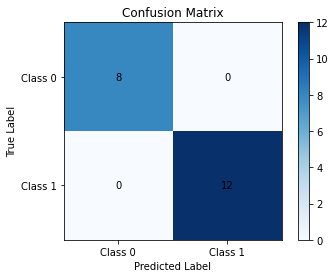

In [37]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

class_labels = [f'Class {i}' for i in range(conf_matrix.shape[0])]
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

plt.show()
